# Launch Turi Create

In [1]:
import turicreate as tc

# Load Housing Sales Data

In [2]:
sales = tc.SFrame('home_data.sframe')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Exploring the data for housing sales

In [4]:
tc.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Create a simple regression model of sqft_living to price

### Split to training set and test set

In [5]:
train_data, test_data = sales.random_split(.8, seed=0)

### Build the regression model

In [6]:
sqft_model = tc.linear_regression.create(train_data, "price", features=["sqft_living"])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.008705     | 4349086.381329     | 2157170.828172       | 262514.738622                   | 270955.719965                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the simple model

In [7]:
print(test_data['price'].mean())

543054.0425632538


In [8]:
sqft_model.evaluate(test_data)

{'max_error': 4143213.125285387, 'rmse': 255192.2937162387}

In [9]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47224.00386494363,5036.398789820328
sqft_living,None,282.0031222021796,2.214209785815263


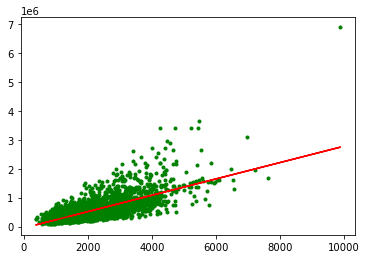

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_data['sqft_living'],test_data['price'],'g.',
        test_data['sqft_living'],sqft_model.predict(test_data),'r-')

In [11]:
train_data['sqft_living'].min()

290.0

In [12]:
train_data['sqft_living'].max()

13540.0

# Explore other features in the data

In [13]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode', 'condition', 'grade', 'yr_built']
sales[features].show()

Materializing SFrame

In [14]:
tc.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a regression model with more features

In [15]:
features_model = tc.linear_regression.create(train_data, target='price', features=features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 9

Number of unpacked features : 9

Number of coefficients    : 78

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.038555     | 4264673.037208     | 2876837.443766       | 180035.869316                   | 201872.464307                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [16]:
print(sqft_model.evaluate(test_data))
print(features_model.evaluate(test_data))

{'max_error': 4143213.125285387, 'rmse': 255192.2937162387}
{'max_error': 3293897.5766579043, 'rmse': 173968.4447589876}


# Use model to predict prices of three houses

In [17]:
house1 = sales[sales['id']=='5309101200']
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [18]:
print("actual: %s" % house1['price'])
print("simple model: %s" % sqft_model.predict(house1))
print("complex model: %s" % features_model.predict(house1))

actual: [620000.0, ... ]
simple model: [629583.4894202874]
complex model: [705411.2017759383]


In [19]:
house2 = sales[sales['id']=='1925069082']
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [20]:
print("actual: %s" % house2['price'])
print("simple model: %s" % sqft_model.predict(house2))
print("complex model: %s" % features_model.predict(house2))

actual: [2200000.0, ... ]
simple model: [1261270.48315317]
complex model: [1169766.9224812044]


In [21]:
bill_gates = tc.SFrame({'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]})

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [22]:
print("simple model: %s" % sqft_model.predict(bill_gates))
print("complex model: %s" % features_model.predict(bill_gates))

simple model: [14052932.106244037]
complex model: [12074648.058661819]


# Quiz

### Selection and summary statistics
In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price.  Now, take the sales data, select only the houses with this zip code, and compute the average price.

In [23]:

seattles = sales[sales['zipcode'] == "98039"]
seattles['price'].mean()

2160606.5999999996

### Filtering data

One of the key features we used in our model was the number of square feet of living space (‘sqft_living’) in the house. For this part, we are going to use the idea of filtering (selecting) data.

- In particular, we are going to use logical filters to select rows of an SFrame. You can find more info in the Logical Filter section of this documentation.

- Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

- What fraction of the all houses have ‘sqft_living’ in this range? Save this result to answer the quiz at the end.

In [24]:
biglot = seattles.filter_by(filter(lambda x: 2000 < x <= 4000, seattles['sqft_living']), 'sqft_living')

Percentage of all houses in `biglot`

In [25]:
len(biglot) / len(seattles)

0.48

In [26]:
features = ['sqft_living']
sqft_model = tc.linear_regression.create(train_data, target='price', features=features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.008460     | 4349521.926170     | 262943.613754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [27]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
some_features_model = tc.linear_regression.create(train_data, target='price', features=features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.035470     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [28]:
features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
all_features_model = tc.linear_regression.create(train_data, target='price', features=features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.030217     | 4336058.938762     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [31]:
print(sqft_model.evaluate(test_data))
print(some_features_model.evaluate(test_data))
print(all_features_model.evaluate(test_data))

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527367}
{'max_error': 3152242.784868988, 'rmse': 180439.07296640595}
{'max_error': 3170363.181382781, 'rmse': 155269.6579279753}
